In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('/content/GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


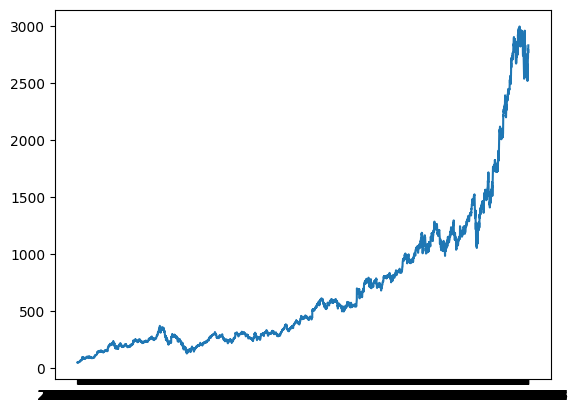

In [5]:
plt.plot(df['Date'], df['Close'])

In [6]:
data = df.loc[:, 'Close'].values
train_data = data[:len(data)-50]
test_data = data[len(train_data):]
train_data = train_data.reshape(train_data.shape[0],1)
test_data = test_data.reshape(test_data.shape[0],1)

In [7]:
train_data.shape, test_data.shape

((4381, 1), (50, 1))

In [8]:
train_data

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [2740.340088],
       [2773.389893],
       [2794.719971]])

In [9]:
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train_data)

In [10]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [11]:
X_train.shape

(4331, 50, 1)

RNN

In [12]:
model = Sequential()
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
# model.add(Dropout(0.2))

# model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
# model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [13]:

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
136/136 [==============================] - 17s 89ms/step - loss: 0.0223 - mae: 0.0858
Epoch 2/10
136/136 [==============================] - 11s 77ms/step - loss: 0.0044 - mae: 0.0408
Epoch 3/10
136/136 [==============================] - 11s 82ms/step - loss: 0.0025 - mae: 0.0305
Epoch 4/10
136/136 [==============================] - 11s 83ms/step - loss: 0.0021 - mae: 0.0278
Epoch 5/10
136/136 [==============================] - 11s 82ms/step - loss: 0.0017 - mae: 0.0240
Epoch 6/10
136/136 [==============================] - 11s 84ms/step - loss: 0.0015 - mae: 0.0235
Epoch 7/10
136/136 [==============================] - 12s 90ms/step - loss: 0.0013 - mae: 0.0212
Epoch 8/10
136/136 [==============================] - 14s 104ms/step - loss: 0.0011 - mae: 0.0202
Epoch 9/10
136/136 [==============================] - 11s 83ms/step - loss: 9.5667e-04 - mae: 0.0185
Epoch 10/10
136/136 [==============================] - 11s 82ms/step - loss: 8.4310e-04 - mae: 0.0176


In [14]:

inputs = scaler.transform(test_data)

In [15]:

inputs.shape

(50, 1)

In [19]:

predicted_data=model.predict(inputs)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 9ms/step


In [20]:
predicted_data

array([[1437.306 ],
       [1415.7523],
       [1422.5336],
       [1396.0593],
       [1389.3397],
       [1375.5262],
       [1352.8892],
       [1356.3599],
       [1326.6252],
       [1344.3025],
       [1342.5509],
       [1375.859 ],
       [1390.7657],
       [1408.5869],
       [1486.795 ],
       [1449.8483],
       [1451.3806],
       [1420.4132],
       [1421.9153],
       [1438.5278],
       [1416.003 ],
       [1382.9752],
       [1392.462 ],
       [1400.7089],
       [1409.3016],
       [1369.649 ],
       [1353.2842],
       [1348.7603],
       [1331.6533],
       [1370.812 ],
       [1384.3264],
       [1388.8857],
       [1381.2876],
       [1385.1813],
       [1380.0504],
       [1364.8076],
       [1322.3372],
       [1327.9307],
       [1376.3864],
       [1368.8112],
       [1349.1979],
       [1319.0413],
       [1344.0337],
       [1375.3201],
       [1379.5883],
       [1397.0306],
       [1396.8479],
       [1425.4722],
       [1413.3864],
       [1438.3765]],

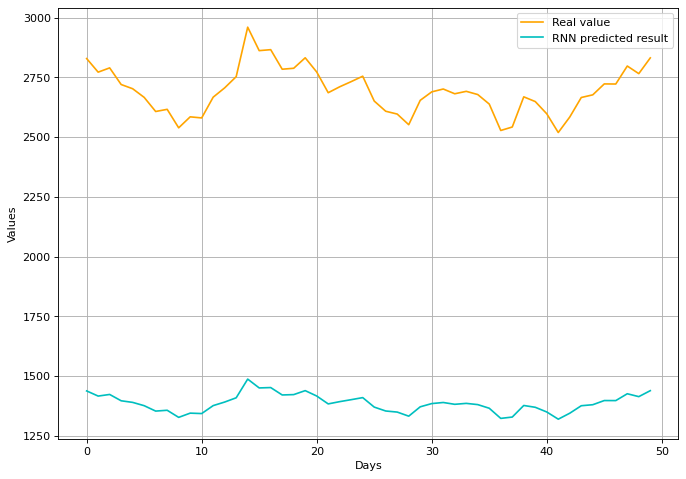

In [21]:
plt.figure(figsize=(10,7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="orange",label="Real value")
plt.plot(predicted_data, color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [22]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))

In [23]:
model.compile(loss="mean_squared_error",optimizer='Adam', metrics=['mae'])
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
4331/4331 [==============================] - 25s 5ms/step - loss: 0.0011 - mae: 0.0130
Epoch 2/50
4331/4331 [==============================] - 22s 5ms/step - loss: 1.1141e-04 - mae: 0.0070
Epoch 3/50
4331/4331 [==============================] - 21s 5ms/step - loss: 9.4136e-05 - mae: 0.0064
Epoch 4/50
4331/4331 [==============================] - 22s 5ms/step - loss: 7.7717e-05 - mae: 0.0058
Epoch 5/50
4331/4331 [==============================] - 21s 5ms/step - loss: 6.1356e-05 - mae: 0.0053
Epoch 6/50
4331/4331 [==============================] - 22s 5ms/step - loss: 5.3077e-05 - mae: 0.0048
Epoch 7/50
4331/4331 [==============================] - 23s 5ms/step - loss: 5.0817e-05 - mae: 0.0047
Epoch 8/50
4331/4331 [==============================] - 20s 5ms/step - loss: 4.8212e-05 - mae: 0.0046
Epoch 9/50
4331/4331 [==============================] - 22s 5ms/step - loss: 4.5783e-05 - mae: 0.0044
Epoch 10/50
4331/4331 [==============================] - 22s 5ms/step - loss: 4.3221e-

LSTM


In [25]:
inputs = scaler.transform(test_data)

In [26]:
predicted_data=model.predict(inputs)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 6ms/step


In [27]:
predicted_data

array([[574.92773],
       [564.45776],
       [567.75085],
       [554.9005 ],
       [551.6413 ],
       [544.9448 ],
       [533.9795 ],
       [535.6598 ],
       [521.272  ],
       [529.82324],
       [528.9755 ],
       [545.1059 ],
       [552.333  ],
       [560.9794 ],
       [599.0049 ],
       [581.02484],
       [581.76996],
       [566.72095],
       [567.45056],
       [575.52155],
       [564.5795 ],
       [548.55536],
       [553.15576],
       [557.15625],
       [561.32623],
       [542.0967 ],
       [534.1708 ],
       [531.98083],
       [523.7035 ],
       [542.6601 ],
       [549.2105 ],
       [551.4212 ],
       [547.73724],
       [549.6249 ],
       [547.1374 ],
       [539.7512 ],
       [519.19885],
       [521.9034 ],
       [545.3615 ],
       [541.6908 ],
       [532.19257],
       [517.6055 ],
       [529.6932 ],
       [544.8448 ],
       [546.91345],
       [555.37177],
       [555.2831 ],
       [569.17804],
       [563.3091 ],
       [575.448  ]],

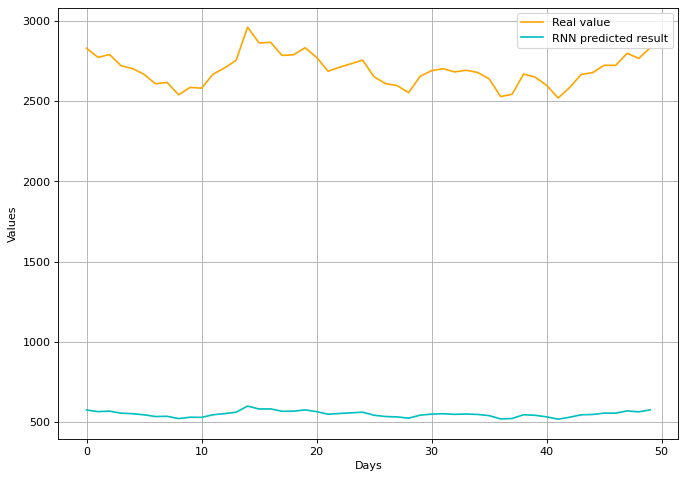

In [28]:
plt.figure(figsize=(10,7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="orange",label="Real value")
plt.plot(predicted_data, color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()